# Map
พอเป็นเวอร์ชั่นใหม่ ใช้ map ได้หมดทั้งที่เป็น series และ dataframe
- map
- applymap  
สิ่งที่สำคัญในการใช้ `map`
- ก็คือการกำหนดค่ากับบางสิ่งเช่น f:front, r:rear'
- จะสร้างฟังก์ชั่นอะไรก็ได้ที่ pandas ไม่มีให้

In [1]:
import pandas as pd

In [4]:
dat  = pd.read_csv('mpg.csv')
df = dat.sample(10).reset_index(drop=True)

In [5]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv
1,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize
2,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
3,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
4,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup
5,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup
6,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
7,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact
8,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize
9,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv


In [9]:
df.manufacturer.str.capitalize()

0        Subaru
1       Pontiac
2    Volkswagen
3    Land rover
4          Ford
5        Toyota
6          Audi
7        Subaru
8        Toyota
9        Nissan
Name: manufacturer, dtype: object

map จะทำงานกับ series เท่านั้น

In [13]:
df['trans_am'] = df.trans.map(lambda v: 'Auto' if v[0] == 'a' else 'Manual')

In [16]:
df['trans_am'] = df.trans.map(lambda v: 'Auto' if v[0] == 'a' else 'Manual').astype('category')

In [17]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
0,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,Auto
1,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize,Auto
2,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,Manual
3,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv,Auto
4,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,Auto
5,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup,Auto
6,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
7,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact,Auto
8,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize,Auto
9,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv,Auto


เขียนแบบปกติก็ได้เหมือนกัน

In [18]:
def am(v):
    if v[0] == 'a':
        return 'auto'
    else:
        return 'manual'

In [19]:
df.trans.map(am)

0      auto
1      auto
2    manual
3      auto
4      auto
5      auto
6    manual
7      auto
8      auto
9      auto
Name: trans, dtype: object

In [21]:
df.drv.map({'f':'Front',
           'r':'Rear',
          '4':'4WD'})

0      4WD
1    Front
2    Front
3      4WD
4      4WD
5      4WD
6    Front
7      4WD
8    Front
9      4WD
Name: drv, dtype: object

In [22]:
df['drv2'] =  df.drv.map({'f':'Front',
           'r':'Rear',
          '4':'4WD'}).astype('category')

In [23]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am,drv2
0,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv,Auto,4WD
1,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize,Auto,Front
2,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,Manual,Front
3,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv,Auto,4WD
4,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup,Auto,4WD
5,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup,Auto,4WD
6,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual,Front
7,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact,Auto,4WD
8,toyota,camry,3.0,1999,6,auto(l4),f,18,26,r,midsize,Auto,Front
9,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv,Auto,4WD


## map (applymap ในเวอร์ชั่นเก่า)

In [47]:
df2 = pd.read_table('currency.tsv',
                   index_col='Year')
df2

,TV,Camera,Phone
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


ถ้าเราทำแบบนี้ต้องทำหลายครั้งมาก สามารถทำได้ครั้งเดียวโดยการใช้ apply map

In [50]:
df2 = df2.applymap(lambda v: int(re.sub(r'\D', '', v)))
df2

C:\Users\Seksatta's PC\AppData\Local\Temp\ipykernel_11960\4158752754.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda v: int(re.sub(r'\D', '', v)))


,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


หรือจะเขียนแบบปกติก็ได้

In [52]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
def remove_nondigit(v):
    return int(re.sub(r'\D', '', v))

In [36]:
remove_nondigit('$500')

500

In [44]:
df2.applymap(remove_nondigit)

C:\Users\Seksatta's PC\AppData\Local\Temp\ipykernel_11960\3234441347.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2.applymap(remove_nondigit)


,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


<Axes: xlabel='Year'>

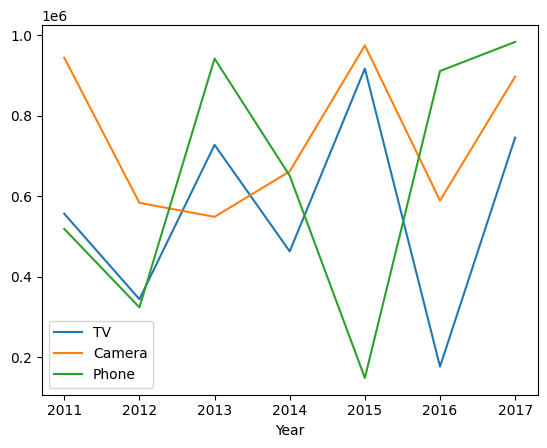

In [56]:
df2.plot()

In [57]:
df3 = pd.read_csv('mpg.csv')

### example 2

In [58]:
df3.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [64]:
df3[['class', 'manufacturer', 'model']].map(str.capitalize)

,class,manufacturer,model
0,Compact,Audi,A4
1,Compact,Audi,A4
2,Compact,Audi,A4
3,Compact,Audi,A4
4,Compact,Audi,A4
...,...,...,...
229,Midsize,Volkswagen,Passat
230,Midsize,Volkswagen,Passat
231,Midsize,Volkswagen,Passat
232,Midsize,Volkswagen,Passat


In [65]:
df3 = df3[['class', 'manufacturer', 'model']].map(str.capitalize)

In [66]:
df3

,class,manufacturer,model
0,Compact,Audi,A4
1,Compact,Audi,A4
2,Compact,Audi,A4
3,Compact,Audi,A4
4,Compact,Audi,A4
...,...,...,...
229,Midsize,Volkswagen,Passat
230,Midsize,Volkswagen,Passat
231,Midsize,Volkswagen,Passat
232,Midsize,Volkswagen,Passat
